In [2]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

## Database no ORM

In [3]:
import pymysql
import pymysql.cursors

In [4]:
import pymysql.cursors

# Connect to the database
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='josh0702',
                             db='employees_2',
                             charset='utf8',
                             cursorclass=pymysql.cursors.DictCursor)

In [5]:
cursor = connection.cursor()
with connection.cursor() as cursor:
    cursor.execute("SELECT count(*) FROM employees_2.employees;")
    result = cursor.fetchone()
    print(result)

{'count(*)': 72}


In [6]:
cursor = connection.cursor()

with connection.cursor() as cursor:
    cursor.execute("SELECT * FROM employees_2.employees;")
    result = cursor.fetchall()
    print(result)

[{'EMPLOYEE_ID': 100, 'FIRST_NAME': 'Steven', 'LAST_NAME': 'King', 'EMAIL': 'SKING', 'PHONE_NUMBER': '515.123.4567', 'HIRE_DATE': '1987-06-17T04:00:00.000Z', 'JOB_ID': 'AD_PRES', 'SALARY': 24000, 'COMMISSION_PCT': Decimal('0.00'), 'MANAGER_ID': 0, 'DEPARTMENT_ID': 90}, {'EMPLOYEE_ID': 101, 'FIRST_NAME': 'Neena', 'LAST_NAME': 'Kochhar', 'EMAIL': 'NKOCHHAR', 'PHONE_NUMBER': '515.123.4568', 'HIRE_DATE': '1987-06-18T04:00:00.000Z', 'JOB_ID': 'AD_VP', 'SALARY': 17000, 'COMMISSION_PCT': Decimal('0.00'), 'MANAGER_ID': 100, 'DEPARTMENT_ID': 90}, {'EMPLOYEE_ID': 102, 'FIRST_NAME': 'Lex', 'LAST_NAME': 'De Haan', 'EMAIL': 'LDEHAAN', 'PHONE_NUMBER': '515.123.4569', 'HIRE_DATE': '1987-06-19T04:00:00.000Z', 'JOB_ID': 'AD_VP', 'SALARY': 17000, 'COMMISSION_PCT': Decimal('0.00'), 'MANAGER_ID': 100, 'DEPARTMENT_ID': 90}, {'EMPLOYEE_ID': 103, 'FIRST_NAME': 'Alexander', 'LAST_NAME': 'Hunold', 'EMAIL': 'AHUNOLD', 'PHONE_NUMBER': '590.423.4567', 'HIRE_DATE': '1987-06-20T04:00:00.000Z', 'JOB_ID': 'IT_PROG', 

In [7]:
connection.close()

# read CSV

In [8]:
# Can open csv files as a dataframe
dframe = pd.read_csv('lec25.csv')

#Show
dframe

,q,r,s,t,apple
0,2,3,4,5,pear
1,a,s,d,f,rabbit
2,5,2,5,7,dog


In [9]:
# Can open csv files as a dataframe
dframe = pd.read_csv('lec25.csv', header = None)

#Show
dframe

,0,1,2,3,4
0,q,r,s,t,apple
1,2,3,4,5,pear
2,a,s,d,f,rabbit
3,5,2,5,7,dog


In [ ]:
# Can also use read_table with ',' as a delimiter
dframe = pd.read_table('lec25.csv',sep=',')

#Show
dframe

In [ ]:
# We can also indicate a particular number of rows to be read
pd.read_csv('lec25.csv',header=None,nrows=2)

In [ ]:
# Now let's see how we can write DataFrames out to text files
dframe.to_csv('mytextdata_out.csv')
#You'll see this file where you're ipython Notebooks are saved (Usually under my documents)

In [14]:
#  We can also use other delimiters

#we'll import sys to see the output
import sys 

#Use sys.stdout to see the output directly and not save it
dframe.to_csv(sys.stdout,sep=',')

,0,1,2,3,4
0,q,r,s,t,apple
1,2,3,4,5,pear
2,a,s,d,f,rabbit
3,5,2,5,7,dog


In [ ]:
# Just to make sure we understand the delimiter
dframe.to_csv(sys.stdout,sep='?')

In [ ]:
#We can also choose to write only a specific subset of columns
dframe.to_csv(sys.stdout,columns=[0,1,2])

# JSON

In [15]:
# Heres an example of what a JSON (JavaScript Object Notation) looks like:
json_obj = """
{   "zoo_animal": "Lion",
    "food": ["Meat", "Veggies", "Honey"],
    "fur": "Golden",
    "clothes": null, 
    "diet": [{"zoo_animal": "Gazelle", "food":"grass", "fur": "Brown"}]
}
"""

In [16]:
#Let import json module
import json

#Lets load json data
data = json.loads(json_obj)
data

{'clothes': None,
 'diet': [{'food': 'grass', 'fur': 'Brown', 'zoo_animal': 'Gazelle'}],
 'food': ['Meat', 'Veggies', 'Honey'],
 'fur': 'Golden',
 'zoo_animal': 'Lion'}

In [17]:
type(data)

dict

In [19]:
#WE can also convert back to JSON
json.dumps(data)

str

In [20]:
#We can simply open JSON data after loading with a DataFrame
dframe = DataFrame(data['diet'])
dframe

,food,fur,zoo_animal
0,grass,Brown,Gazelle


# HTML

In [24]:
#Lets grab a url for list of failed banks ，http://www.fdic.gov/bank/individual/failed/banklist.html
url = 'https://baike.baidu.com/item/%E9%A2%86%E5%AF%BC%E4%BA%BA'

In [25]:
# Grab data from html and put it intop a list of DataFrame objects!
dframe_list = pd.io.html.read_html(url,header=0)
dframe_list

[   代   姓名                                         重要职务（担任年份）   指导思想  \
 0  一  毛泽东  中国共产党中央委员会主席(1945-1976) 中国人民政治协商会议全国委员会主席(1949...  毛泽东思想   
 1  二  邓小平  中国人民政治协商会议全国委员会主席(1978-1983) 中国共产党中央军事委员会主席(19...  邓小平理论   
 2  三  江泽民  中国共产党中央委员会总书记(1989-2002) 中国共产党中央军事委员会主席(1989-2...   三个代表   
 3  四  胡锦涛  中国共产党中央委员会总书记(2002-2012) 中华人民共和国主席(2003-2013) ...  科学发展观   
 4  五  习近平  中国共产党中央委员会总书记 (2012开始) 中国共产党中央军事委员会主席 (2012开始)...    NaN   
 
                           生卒  
 0  生：1893年12月26日 卒：1976年9月9日  
 1  生：1904年8月22日 卒：1997年2月19日  
 2               生：1926年8月17日  
 3                 生：1942年12月  
 4                  生：1953年6月  ,    毛泽东  邓小平  江泽民
 0  胡锦涛  习近平  NaN,        等级   行政级别                                             代表政府职务  \
 0       1  国家级正职                                              国务院总理   
 1     2-4  国家级副职                                        国务院副总理、国务委员   
 2     4-8  省部级正职                             省、直辖市、自治区正职 国务院部委部长或主任   
 3    6-10  省部级副职                 省、直辖市、自治区副职 国务院部

In [26]:
#Grab the first list item from the data base and set as a DataFrame
dframe = dframe_list[0]
dframe

,代,姓名,重要职务（担任年份）,指导思想,生卒
0,一,毛泽东,中国共产党中央委员会主席(1945-1976) 中国人民政治协商会议全国委员会主席(1949...,毛泽东思想,生：1893年12月26日 卒：1976年9月9日
1,二,邓小平,中国人民政治协商会议全国委员会主席(1978-1983) 中国共产党中央军事委员会主席(19...,邓小平理论,生：1904年8月22日 卒：1997年2月19日
2,三,江泽民,中国共产党中央委员会总书记(1989-2002) 中国共产党中央军事委员会主席(1989-2...,三个代表,生：1926年8月17日
3,四,胡锦涛,中国共产党中央委员会总书记(2002-2012) 中华人民共和国主席(2003-2013) ...,科学发展观,生：1942年12月
4,五,习近平,中国共产党中央委员会总书记 (2012开始) 中国共产党中央军事委员会主席 (2012开始)...,NaN,生：1953年6月


In [ ]:
dframe.columns.values

# excell

In [21]:
# Open the excel file as an object
xlsfile = pd.ExcelFile('Campus Metadata.xlsx')

In [22]:
# Parse the first sheet of the excel file and set as DataFrame
dframe = xlsfile.parse('Data')

In [23]:
#Show!
dframe

,cust_num,month,cust_demographics_ai,cust_demographics_aii,typeA_ct,typeB_ct,typeC_flag,typeD_flag,typeE_flag,typeF_flag,...,cust_outreach_aiii,cust_outreach_aiv,cust_outreach_av,cust_outreach_avi,cust_outreach_avii,cust_outreach_aviii,wf_outreach_flag_chan_i,wf_outreach_flag_chan_ii,wf_outreach_flag_chan_iii,wf_outreach_flag_chan_iv
0,9246,9,4,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1273,2,3,3,2,1,0,0,0,1,...,0,0,0,2,0,0,0,0,0,0
2,6682,8,3,3,1,3,0,0,0,0,...,2,0,0,0,3,0,0,0,0,0
3,7946,5,4,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3681,4,1,1,1,1,0,0,0,0,...,0,0,0,2,0,0,0,1,0,0
5,7349,10,1,1,1,1,0,0,0,0,...,0,0,15,19,0,0,0,1,0,0
6,6659,3,3,3,1,1,1,0,0,1,...,1,1,7,34,0,0,1,1,0,0
7,7416,12,5,5,1,1,0,0,0,0,...,3,2,0,0,0,0,1,1,0,0
8,6926,7,2,3,1,1,1,0,0,0,...,0,0,2,7,4,0,1,1,0,0
9,360,8,3,3,1,1,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0


## npy

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [10]:
train_data = np.load('../data/training_data-1.npy')
train_data.shape

(500, 10)

In [11]:
type(train_data)

numpy.ndarray

In [12]:
train_data[499][0].dtype

dtype('uint8')

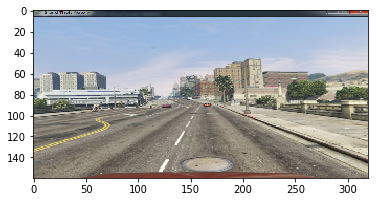

In [5]:
rgb_img = cv2.cvtColor(train_data[150][0], cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(rgb_img)

In [6]:
a = np.arange(15).reshape(3,5)

In [7]:
np.save("a.npy",a)

In [8]:
b = np.load('a.npy')
b

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [9]:
c=np.array([1,0,1,0])

In [10]:
np.savez("files.npz",a,b,c_array=c)

In [11]:
D=np.load("files.npz")

In [12]:
D['arr_0']

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [13]:
D['arr_1']

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [14]:
D['c_array']

array([1, 0, 1, 0])

## h5

HDF5 lets you store huge amounts of numerical data, and easily manipulate that data from NumPy.
For example, you can slice into multi-terabyte datasets stored on disk, as if they were real NumPy arrays.

<img src= "hdf5.png" width="450"/>

In [1]:
import h5py
import numpy as np  

In [2]:
?h5py.File

In [3]:
imgData = np.zeros((30,3,128,256))  
f = h5py.File('HDF5_FILE.h5','w')
f['data'] = imgData
f['labels'] = range(100)
f.close()                           #关闭文件  

In [4]:
f = h5py.File('HDF5_FILE.h5','r') 
f.keys()
a = f['data'][:]   
f.close()  

In [5]:
f = h5py.File("testfile.h5")
arr = np.ones((5,2))
f["my dataset"] = arr
dset = f["my dataset"]
dset

RuntimeError: Unable to create link (Name already exists)

In [8]:
dset.dtype
dset.shape
f.close()

In [13]:
with h5py.File("imagetest.h5", "w") as f:
    dset = f.create_dataset("Images", (500, 160, 320,3), dtype='uint8')
    for idx in range(500):
        dset[idx, :, :] = train_data[idx][0]
        f.flush()

KeysView(<HDF5 file "imagetest.h5" (mode r)>)


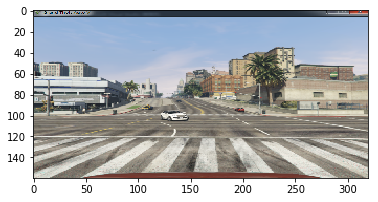

In [19]:
with h5py.File("imagetest.h5", "r") as f:
    print(f.keys())
    images = f['Images']
    rgb_img = cv2.cvtColor(images[180], cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(rgb_img)